### *Tarea M45 - Bryan Alberto Coronado García*
---

#### **Importación de un modelo con datos de tarjetas de crédito (cc general.csv).**

In [1]:
# Básicas
# ---------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# Clustering
# ---------------------------------------
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import cdist
#----------------------------------------------------

os.chdir('c:/Users/DomesticoRemoto/Desktop')
os.getcwd()

df = pd.read_csv('CC_GENERAL.csv', sep=',')
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### **Exploratory Data Analysis (EDA)**

In [2]:
print(df.shape)
df.info()

(8950, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  


In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Se modifican los decimales para mejor legibilidad
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.000,1564.475,2081.532,0.000,128.282,873.385,2054.140,19043.139
BALANCE_FREQUENCY,8950.000,0.877,0.237,0.000,0.889,1.000,1.000,1.000
PURCHASES,8950.000,1003.205,2136.635,0.000,39.635,361.280,1110.130,49039.570
ONEOFF_PURCHASES,8950.000,592.437,1659.888,0.000,0.000,38.000,577.405,40761.250
INSTALLMENTS_PURCHASES,8950.000,411.068,904.338,0.000,0.000,89.000,468.637,22500.000
CASH_ADVANCE,8950.000,978.871,2097.164,0.000,0.000,0.000,1113.821,47137.212
PURCHASES_FREQUENCY,8950.000,0.490,0.401,0.000,0.083,0.500,0.917,1.000
ONEOFF_PURCHASES_FREQUENCY,8950.000,0.202,0.298,0.000,0.000,0.083,0.300,1.000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.000,0.364,0.397,0.000,0.000,0.167,0.750,1.000
CASH_ADVANCE_FREQUENCY,8950.000,0.135,0.200,0.000,0.000,0.000,0.222,1.500


In [4]:
print(f'Existe una presencia de {df.isnull().sum().sum()} valores nulos')

Existe una presencia de 314 valores nulos


In [5]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

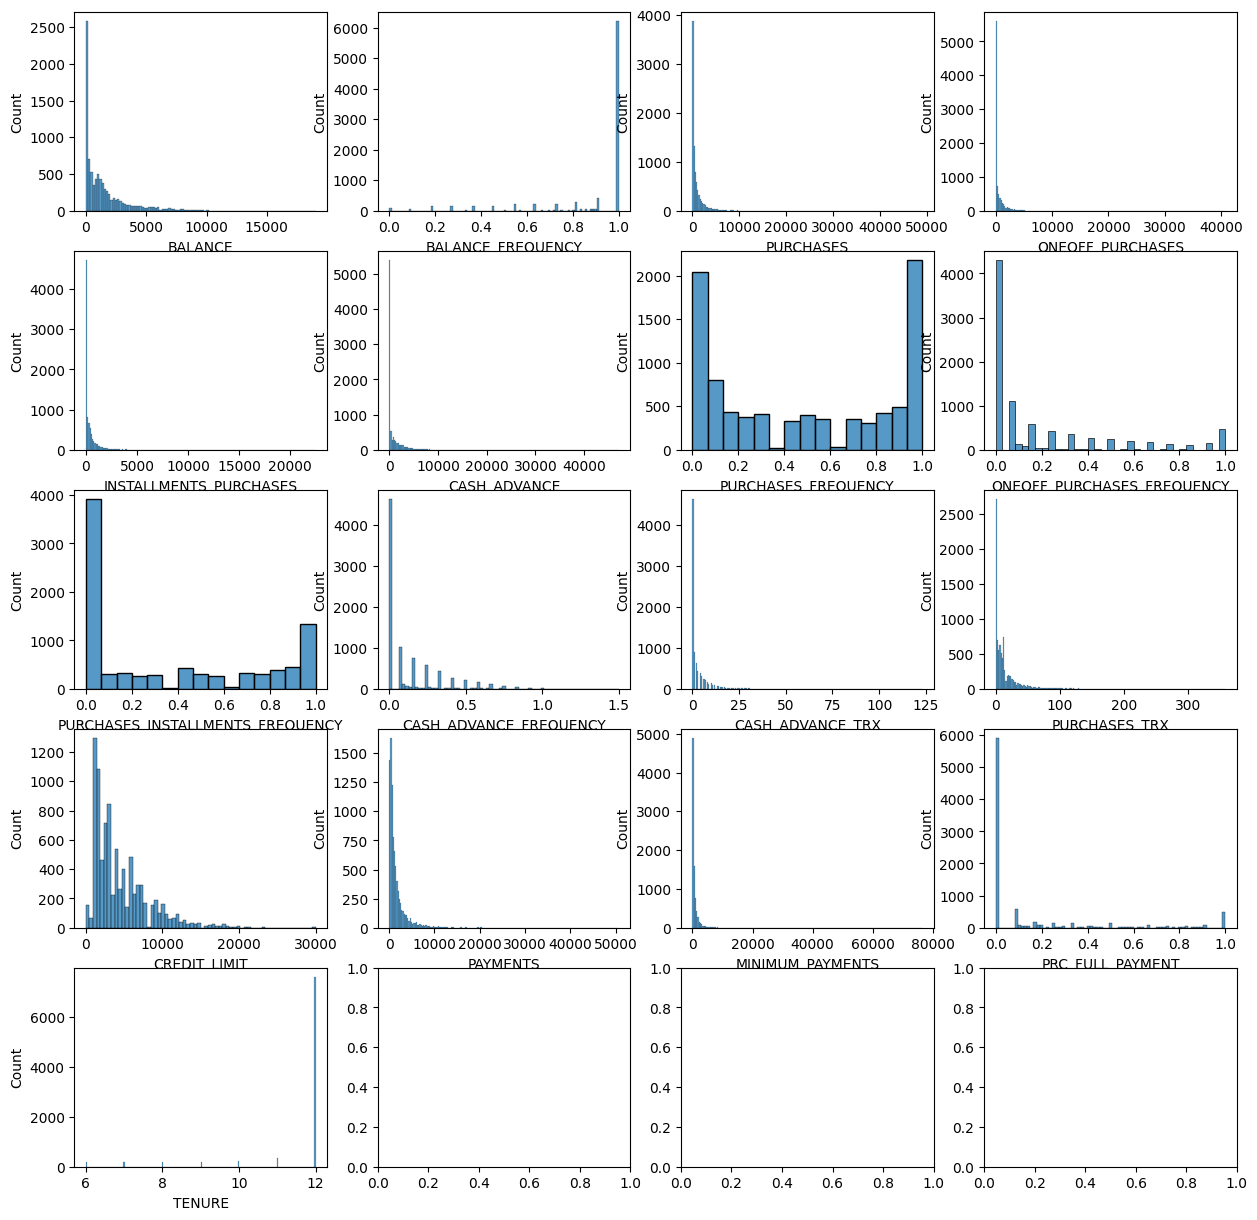

In [6]:
# Graficación de las variables antes del Feature Engineering

col_nums = df.select_dtypes(include=[np.number]).columns

fig, axes =  plt.subplots(nrows=5, ncols=4, figsize=(15,15))
for i, column in enumerate(col_nums):
    sns.histplot(df[column], ax=axes[i//4, i%4], kde=False)

##### Modificaciones para Feature Engineering

- Eliminación de columna 'CUST_ID' (Al ser una columna de identificadores no aporta datos reales para la elaboración del modelo).
- Se requiere imputación de datos en columnas con datos faltantes 'MINIMUM_PAYMENTS' y 'CREDIT_LIMIT', 314 datos faltantes.
- Aplicación de función zeros para estandarización de las columnas numéricas.
- No hay existencia de columnas con datos únicos a eliminar
- No se necesita editar tipos de datos en las columnas
- Generar dos DataFrames copia del original para el Clustering

#### **Feature Engineering: Estandarización, eliminación, y nuevas columnas**

In [7]:
# Copias del DataFrame original
# ----------------------------------------------
df2 = df.copy()
# ----------------------------------------------
df3= df.copy()
# ----------------------------------------------

In [8]:
# Eliminiación de columnas innecesarias para el modelo
df2.drop(columns=['CUST_ID'], inplace=True)
df2.sample(3)
# ----------------------------------------------

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2513,1115.209,1.000,30.000,30.000,0.000,1484.671,0.083,0.083,0.000,0.417,11,1,1500.000,1839.909,570.914,0.083,12
3089,4075.540,1.000,0.000,0.000,0.000,3502.346,0.000,0.000,0.000,0.250,4,0,14000.000,8012.850,1088.218,0.000,12
1993,2097.603,1.000,963.210,963.210,0.000,0.000,1.000,1.000,0.000,0.000,0,11,2100.000,622.542,1252.200,0.000,6


In [9]:
# Promedio de los valores nulos
avg_minimum = df2['MINIMUM_PAYMENTS'].mean()
avg_credit = df2['CREDIT_LIMIT'].mean()
# ----------------------------------------------
# Imputación de datos faltantes
df2['MINIMUM_PAYMENTS'].fillna(avg_minimum, inplace=True)
df2['CREDIT_LIMIT'].fillna(avg_credit, inplace=True)
# ----------------------------------------------
print(f'En esta data existen {df2.isnull().sum().sum()} valores nulos')

En esta data existen 0 valores nulos


In [10]:
# Escalamiento "Zscore"

from scipy.stats import zscore
df2 = df2.apply(zscore)

df2.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.000,0.000,1.000,-0.752,-0.690,-0.332,0.235,8.397
BALANCE_FREQUENCY,8950.000,0.000,1.000,-3.703,0.049,0.518,0.518,0.518
PURCHASES,8950.000,0.000,1.000,-0.470,-0.451,-0.300,0.050,22.484
ONEOFF_PURCHASES,8950.000,0.000,1.000,-0.357,-0.357,-0.334,-0.009,24.201
INSTALLMENTS_PURCHASES,8950.000,0.000,1.000,-0.455,-0.455,-0.356,0.064,24.427
CASH_ADVANCE,8950.000,0.000,1.000,-0.467,-0.467,-0.467,0.064,22.011
PURCHASES_FREQUENCY,8950.000,-0.000,1.000,-1.222,-1.014,0.024,1.062,1.270
ONEOFF_PURCHASES_FREQUENCY,8950.000,-0.000,1.000,-0.679,-0.679,-0.399,0.327,2.673
PURCHASES_INSTALLMENTS_FREQUENCY,8950.000,0.000,1.000,-0.917,-0.917,-0.498,0.970,1.599
CASH_ADVANCE_FREQUENCY,8950.000,0.000,1.000,-0.675,-0.675,-0.675,0.435,6.821


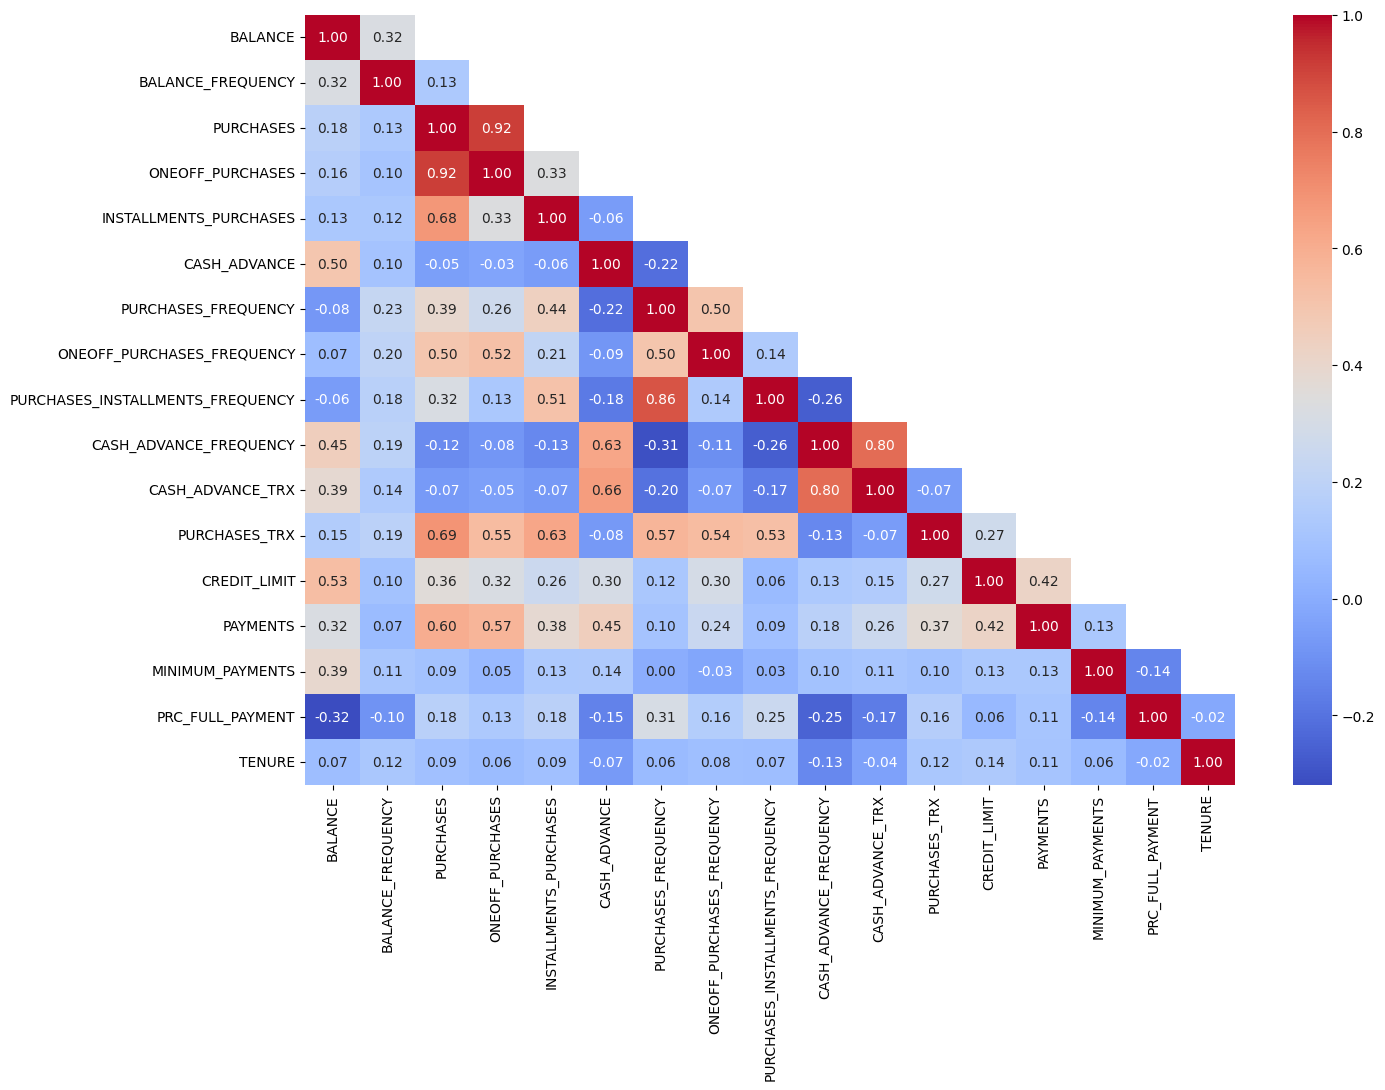

In [11]:
# Grafica para correlacionar variables

plt.figure(figsize=(15, 10))
corr_df = df2.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(df2.corr().shape), k=1).astype(bool))
sns.heatmap(df_lt, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# ----------------------------------------------
# Sin correlaciones importantes que afecten el modelo
# ----------------------------------------------

In [12]:
# Generacion de variable para columnas numéricas
# ----------------------------------------------
cols_num = df2.select_dtypes(include=[np.number]).columns
print(cols_num)
print(len(cols_num))
# ----------------------------------------------

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')
17


[Text(0, 0, ' '),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, '')]

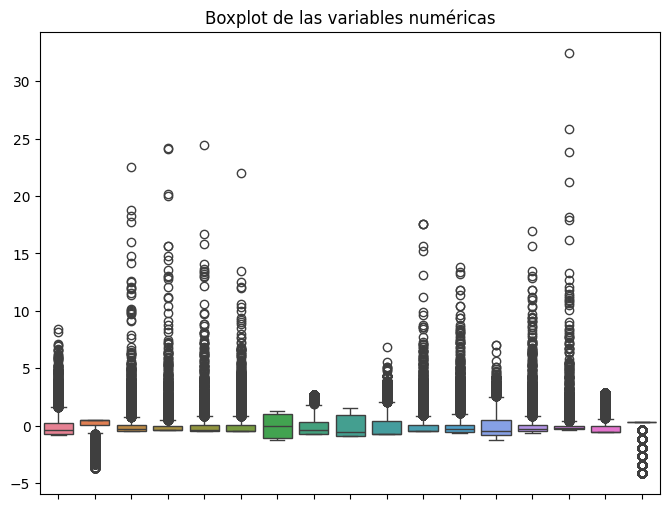

In [13]:
# Boxplot para detectar outliers

plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df2[cols_num])
ax.set_title('Boxplot de las variables numéricas')
ax.set_xticklabels(' ')

IndexError: index 4 is out of bounds for axis 0 with size 4

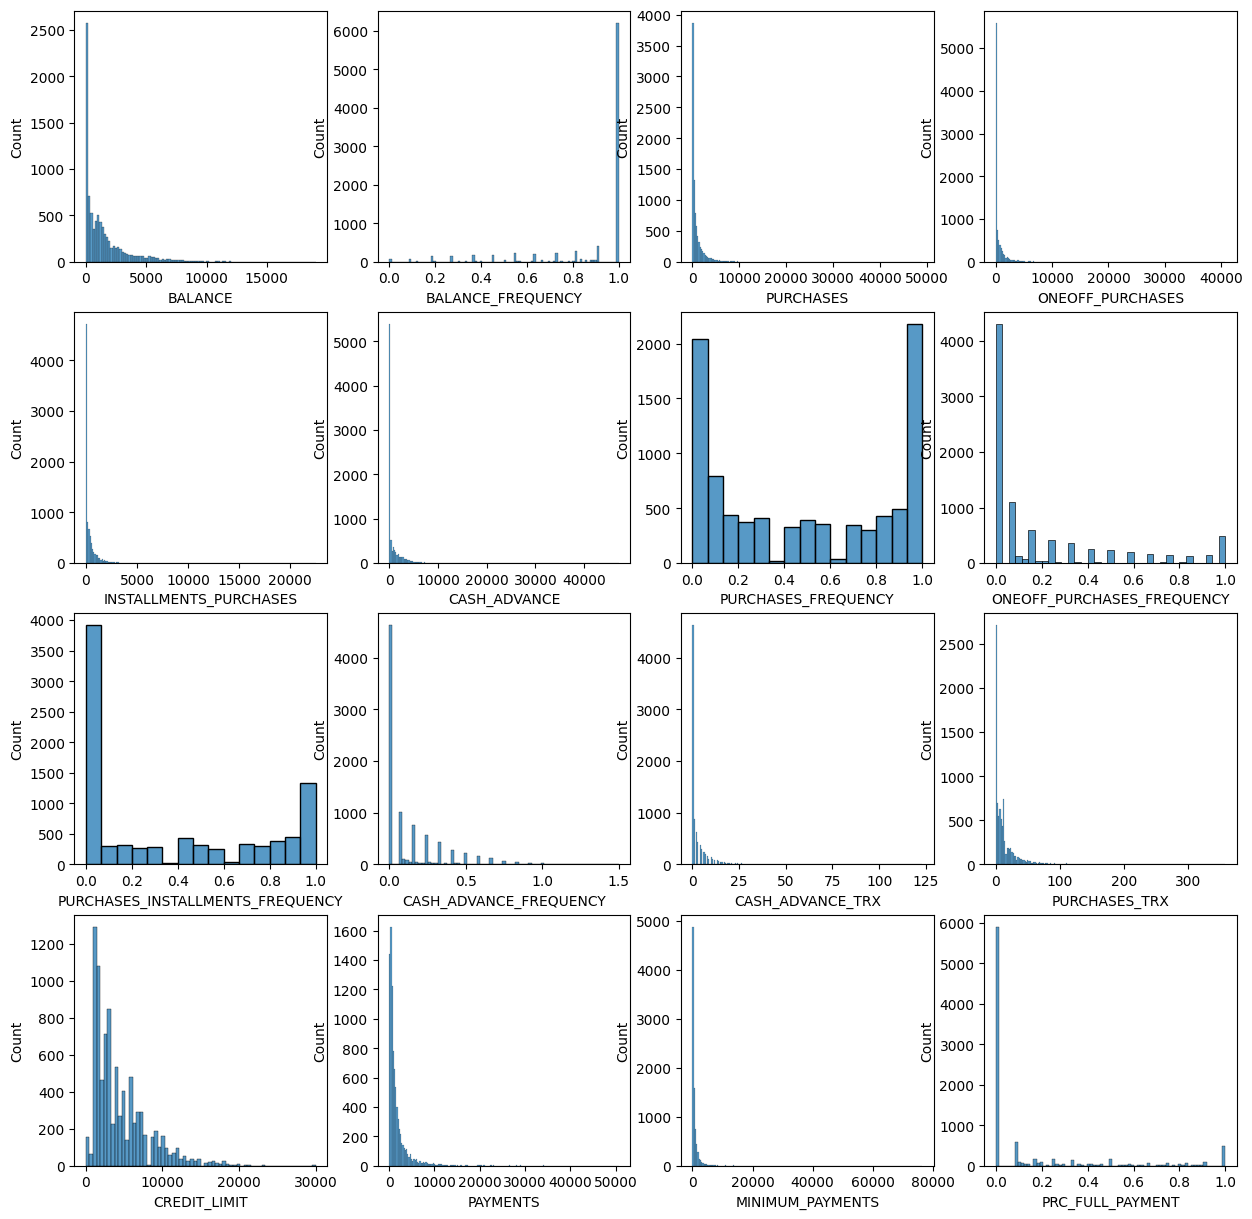

In [14]:
# Gráfica con escalamiento aplicado

fig, axes =  plt.subplots(nrows=4, ncols=4, figsize=(15,15))
for i, column in enumerate(cols_num):
    sns.histplot(df[column], ax=axes[i//4, i%4], kde=False)

#### **Uso de algoritmo K-Means: elbow plot, análisis.**

Text(0.5, 1.0, 'Resultados KMeans')

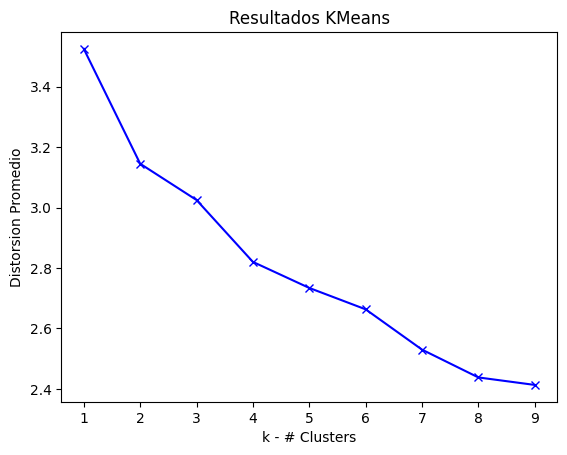

In [19]:
clusters = range(1,10)
meanDistortions=[]

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df2)
    prediction = model.predict(df2)
    meanDistortions.append(sum(np.min(cdist(df2, model.cluster_centers_, 'euclidean'), axis=1)) / df2.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k - # Clusters')
plt.ylabel('Distorsion Promedio')
plt.title('Resultados KMeans')

#### **Visualización de los resultados del modelo de clustering: bar plots y clases – identificación y perfilamiento de clases.**

In [62]:
# El número de clusters adecuado parece ser 2, el cual se procede a utilizar como parámetro.

kmeans = KMeans(n_clusters=4, n_init = 15, random_state=1)
kmeans.fit(df2)

,n_clusters,4
,init,'k-means++'
,n_init,15
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,1
,copy_x,True
,algorithm,'lloyd'


In [63]:
# Se generan los labels al que pertenecen los registros
df_labels = pd.DataFrame(kmeans.labels_, columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

# Se genera la unión con el tercer DataFrame copia del original
df_labeled = df3.join(df_labels)
df_labeled.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,C10001,40.901,0.818,95.400,0.000,95.400,0.000,0.167,0.000,0.083,0.000,0,2,1000.000,201.802,139.510,0.000,12,0
1,C10002,3202.467,0.909,0.000,0.000,0.000,6442.945,0.000,0.000,0.000,0.250,4,0,7000.000,4103.033,1072.340,0.222,12,1
2,C10003,2495.149,1.000,773.170,773.170,0.000,0.000,1.000,1.000,0.000,0.000,0,12,7500.000,622.067,627.285,0.000,12,3
3,C10004,1666.671,0.636,1499.000,1499.000,0.000,205.788,0.083,0.083,0.000,0.083,1,1,7500.000,0.000,NaN,0.000,12,0
4,C10005,817.714,1.000,16.000,16.000,0.000,0.000,0.083,0.083,0.000,0.000,0,1,1200.000,678.335,244.791,0.000,12,0


labels
0    3976
3    3367
1    1198
2     409
Name: count, dtype: int64


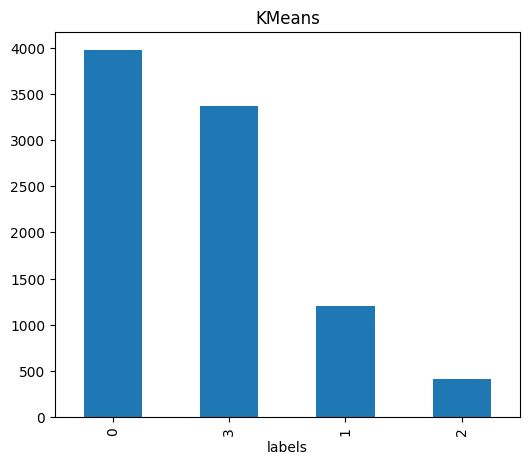

In [64]:
print(df_labeled['labels'].value_counts())

fix, ax = plt.subplots(1,1, figsize=(6,5))
pd.value_counts(df_labeled["labels"]).plot(kind='bar').set_title('KMeans')
plt.show()

Text(0.5, 0.98, 'Clusters Por Variable')

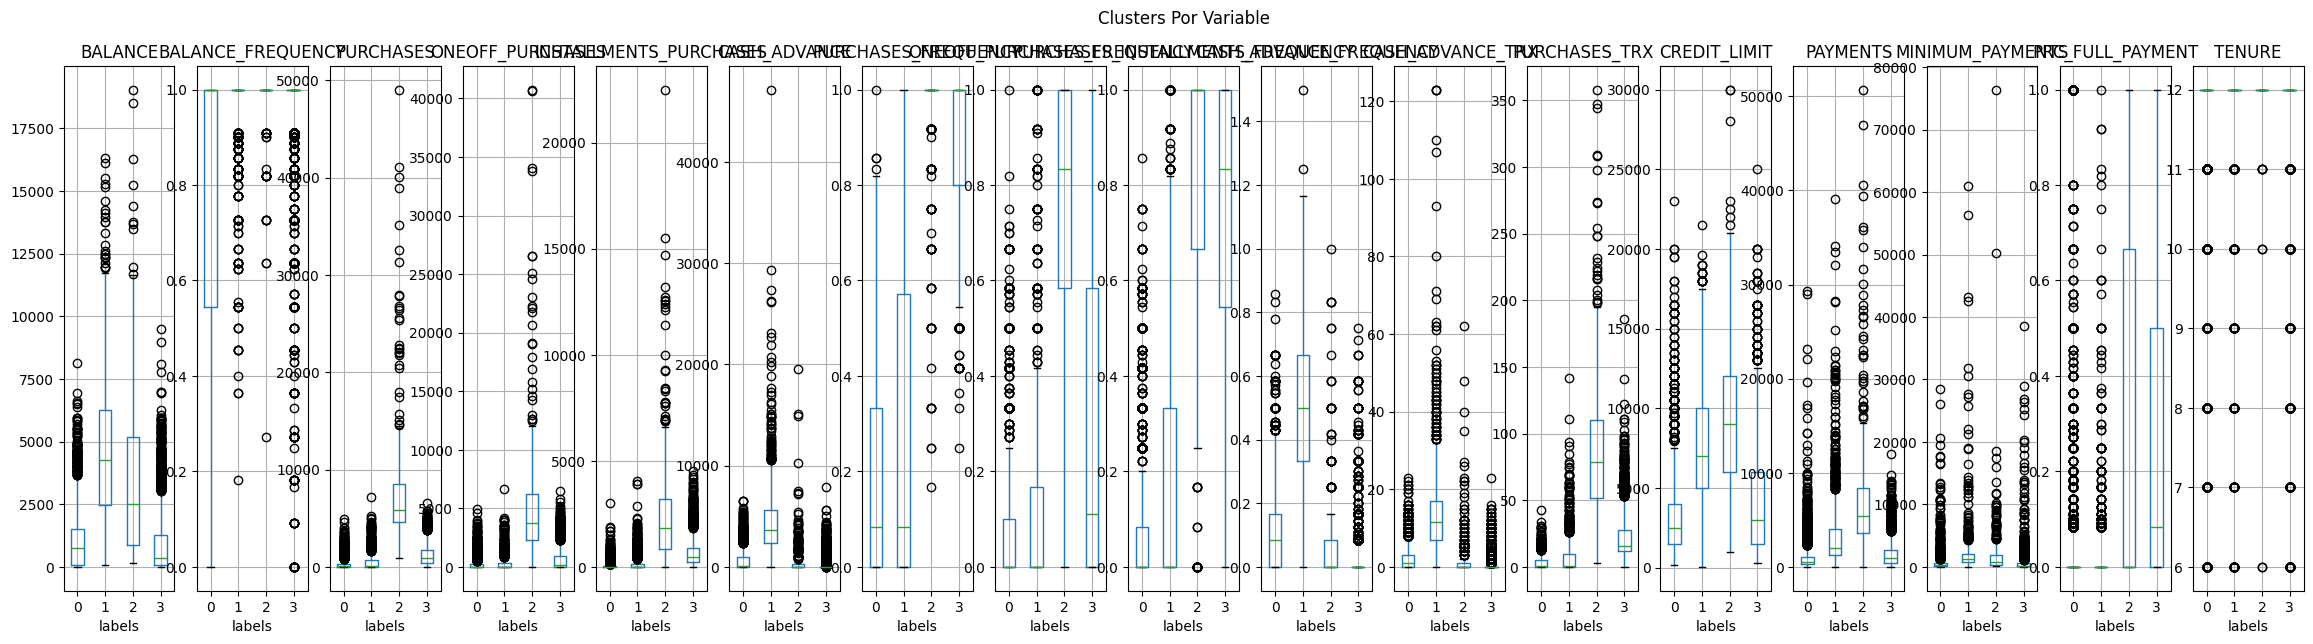

In [65]:
# Gráfico de clases

fig, ax = plt.subplots(1,17, figsize=(28,7))
df_labeled.boxplot('BALANCE', 'labels', ax=ax[0]) 
df_labeled.boxplot('BALANCE_FREQUENCY', 'labels', ax=ax[1]) 
df_labeled.boxplot('PURCHASES', 'labels', ax=ax[2]) 
df_labeled.boxplot('ONEOFF_PURCHASES', 'labels', ax=ax[3]) 
df_labeled.boxplot('INSTALLMENTS_PURCHASES', 'labels', ax=ax[4])
df_labeled.boxplot('CASH_ADVANCE', 'labels', ax=ax[5]) 
df_labeled.boxplot('PURCHASES_FREQUENCY', 'labels', ax=ax[6]) 
df_labeled.boxplot('ONEOFF_PURCHASES_FREQUENCY', 'labels', ax=ax[7]) 
df_labeled.boxplot('PURCHASES_INSTALLMENTS_FREQUENCY', 'labels', ax=ax[8]) 
df_labeled.boxplot('CASH_ADVANCE_FREQUENCY', 'labels', ax=ax[9]) 
df_labeled.boxplot('CASH_ADVANCE_TRX', 'labels', ax=ax[10]) 
df_labeled.boxplot('PURCHASES_TRX', 'labels', ax=ax[11]) 
df_labeled.boxplot('CREDIT_LIMIT', 'labels', ax=ax[12])
df_labeled.boxplot('PAYMENTS', 'labels', ax=ax[13]) 
df_labeled.boxplot('MINIMUM_PAYMENTS', 'labels', ax=ax[14]) 
df_labeled.boxplot('PRC_FULL_PAYMENT', 'labels', ax=ax[15]) 
df_labeled.boxplot('TENURE', 'labels', ax=ax[16])
fig.suptitle('Clusters Por Variable')

#### **Dendogramas y validación de la calidad del fit.**

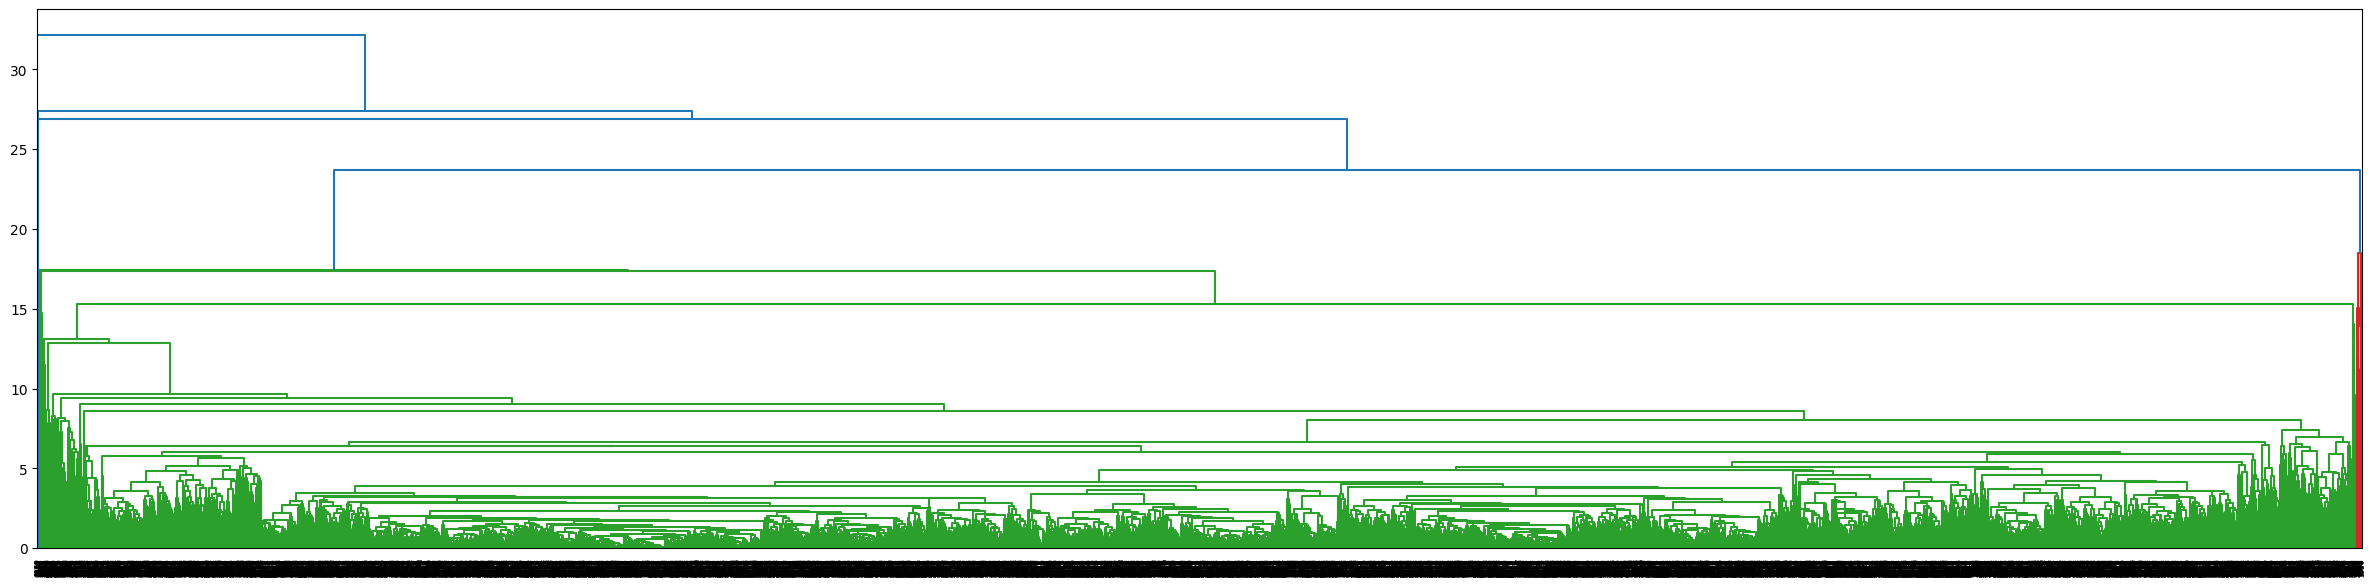

In [55]:
Z = linkage(df2, 'average', metric='euclidean')
Z.shape

plt.figure(figsize=(30,7))
dendrogram(Z)
plt.show()

# -----------------------------------------------------------------------------------------------------------
# Hago evidente la poca legibilidad que tiene este gráfico al tener demasiadas variaciones con sus variables
# -----------------------------------------------------------------------------------------------------------

#### **Silhouette score.**

In [59]:
from sklearn.metrics import silhouette_score

sil_list = []
clusters = range(2, 11)

for n_clusters in clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict(df2)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df2, clusterer.labels_, metric='euclidean')
    sil_list.append({'Model': 'Kmeans', 'n_clusters': n_clusters, 'score': score})

sil_df = pd.DataFrame(sil_list)

Text(0.5, 1.0, 'Silhouette Score')

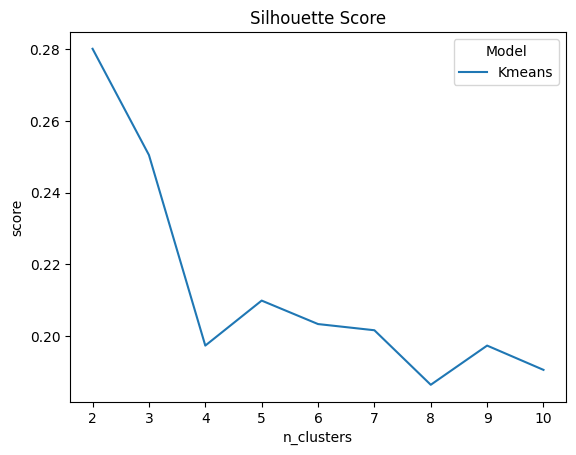

In [61]:
sns.lineplot(data=sil_df, x='n_clusters', y='score', hue='Model', style='Model', ci=None).set_title('Silhouette Score')

#### **Interpretación final de resultados de los clusters generados por el modelo**

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------------
# En resultados finales con ayuda del Silhouette Score se logra identificar que los clusters necesarios para el modelo eran 4.
# ----------------------------------------------------------------------------------------------------------------------------
# Los KMeans nos hicieron saber el recargamiento que tiene la selección hacía el label 0, disminuyendo mientras aumentaba el
# label de los 4 a tomar para el modelo
# ----------------------------------------------------------------------------------------------------------------------------
# Debido a la cantidad de variables a tomar en cuenta, los gráficos a valoración resultaron poco legibles, siendo necesaria
# la posibilidad de reducir e indicar que variables especificas se necesitan valorar para que le información resultante tenga
# datos que puedan  tomar una mejor fuente y explicación
# ----------------------------------------------------------------------------------------------------------------------------